# Machine Learning:

## About the Data:

Zomato is an Indian multinational restaurant aggregator and food delivery 
company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato 
provides information, menus, and user reviews of restaurants as well as food 
delivery options from partner restaurants in select cities.

# Section A: Title: Regression model

## Steps that are to be followed:

## Step 1: Understand the business problem.

## Problem:

Restaurants from all over the world can be found here in Bengaluru. From the United States 
to Japan, Russia to Antarctica, you get all types of cuisines here. Delivery, Dine-out, Pubs, 
Bars, Drinks, Buffet, Desserts you name it and Bengaluru has it. Bengaluru is the best place 
for foodies. The number of restaurants is increasing day by day. Currently, it stands at 
approximately 12,000 restaurants. With such a high number of restaurants. This industry 
hasn't been saturated yet. And new restaurants are opening every day. However, it has 
become difficult for them to compete with already established restaurants. The key issues 
that continue to pose a challenge to them include high real estate costs, rising food costs, 
shortage of quality manpower, fragmented supply chain, and over-licensing. 


## Objective:
The newly started companies are not able to decide the cost that would happen per 
two people for once. So the Zomato company has a good analyst team who can predict the 
cost per two customers for one time so that the newly started restaurants and upcoming 
restaurants will be well prepared how the restaurant should invest in improving the 
ambiance and all other stuff to attract the customers. Assume you are the analyst team that 
Zomato has organized to help new and upcoming restaurants by letting them know the 
various reasons that customers look for and build a model which able to predict the cost for 
two people.

## Step 2: Read the data, and convert the data types.
Note: The data set has numerical and categorical data but due to noise(anomaly) in 
the data, the columns are treated as the object type. And You may feel like converting the 
features into numerical at this step if not appropriate at this stage, In that case, feel free to 
convert the variable to the appropriate type in the further step as well based on your way 
of analyzing the data.

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[12,7]

In [178]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [179]:
df.shape

(51717, 17)

In [180]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [181]:
# Cleaning and Converting the rate column
df.rate=list(map(lambda x:str(x).replace('/','').strip('5'),df.rate))
df.rate=list(map(lambda x:str(x).replace('-','NAN').replace('NEW','NAN'),df.rate))
df.rate=df.rate.astype('float')

In [182]:
# Cleaning and Converting the approx_cost(for two people) column
df['approx_cost(for two people)']=list(map(lambda x:str(x).replace(',',''),df['approx_cost(for two people)']))
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('float')

In [183]:
df['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [186]:
# Droping the unnecessary columns
df1=df.drop(['url','address','phone'],axis=1)
df1=df1.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(type)':'type','listed_in(city)':'city'})

In [187]:
df1.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
approx_cost     float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

## Step 3: Perform the described method for the data, Try to find any essential points from the described analysis. And check the missing values and Duplicate records. Impute the missing values in the best way possible.
#### Note: To impute the missing values with parameters, You must find the best parameter.
#### Hints:
● Check the distribution using plots. And check the Skewness, Kurtosis and etc. 

In [188]:
# Describing the Numerial data
df1.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.679772,283.697527,555.431566
std,0.455416,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.300000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


* The average approx_cost is 555.43
* The maximun cost for two people is 6000

In [189]:
# Describing the Categorical data
df1.describe(include='object').T

,count,unique,top,freq
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182
cuisines,51672,2723,North Indian,2913
reviews_list,51717,22513,[],7595
menu_item,51717,9098,[],39617
type,51717,7,Delivery,25942


* We can see that there are missing values in the dataset
* There are many unique values in few columns

In [190]:
# Duplicate records
df1[df1.duplicated()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city
596,My Tea House,Yes,Yes,NaN,0,Banashankari,Casual Dining,NaN,"Continental, Asian, North Indian, Tea",500.0,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6,10,Bannerghatta Road,Food Court,NaN,"South Indian, Beverages",400.0,"[('Rated 4.0', 'RATED\n It was yesterday I vi...",[],Dine-out,Bannerghatta Road
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,NaN,Biryani,400.0,[],[],Delivery,Bellandur
7599,Nawab Di Biryani,Yes,No,NaN,0,Whitefield,"Takeaway, Delivery",NaN,"Biryani, Mughlai",400.0,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",Delivery,Brookefield
9342,Healthy Parathawala,Yes,No,NaN,0,BTM,Quick Bites,NaN,North Indian,200.0,[],"['Aloo Paratha Chole Combo', 'Gobi Paratha Cho...",Delivery,BTM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46553,House Of Candy,Yes,No,NaN,0,Malleshwaram,Confectionery,NaN,Desserts,200.0,[],[],Delivery,Rajajinagar
49193,Sri Ganesh Juice Junction,Yes,No,3.5,6,Bellandur,Beverage Shop,NaN,"Juices, Fast Food",200.0,"[('Rated 4.0', 'RATED\n A perfect place to dr...",[],Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,NaN,Biryani,400.0,[],[],Delivery,Sarjapur Road
50405,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,NaN,Desserts,200.0,[],[],Delivery,Whitefield


In [191]:
# droping the duplicated values
df1=df1.drop_duplicates()

In [192]:
# checking the missing values 
count=df1.isnull().sum()
percentage=(df1.isnull().sum()/len(df))*100
null=pd.concat([count,percentage],axis=1,keys=['count','percentage'])
null[null['count']!=0]

,count,percentage
rate,10027,19.388209
location,21,0.040606
rest_type,227,0.438927
dish_liked,28027,54.193012
cuisines,45,0.087012
approx_cost,345,0.667092


The skewness of the  rate is  -0.35031757051667795
The kurtosis of the  rate is  -0.1626813437178094
The skewness of the  approx_cost is  2.601927291030774
The kurtosis of the  approx_cost is  10.44937604208583


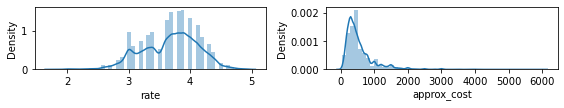

In [193]:
# checking the skewness and kurtosis
cols=['rate','approx_cost']
it=1
for i in cols:
    plt.subplot(2,2,it)
    sns.distplot(df1[i])
    print('The skewness of the ',i,'is ',df1[i].skew())
    print('The kurtosis of the ',i,'is ',df1[i].kurt())
    it+=1
plt.tight_layout()
plt.show()

<AxesSubplot:>

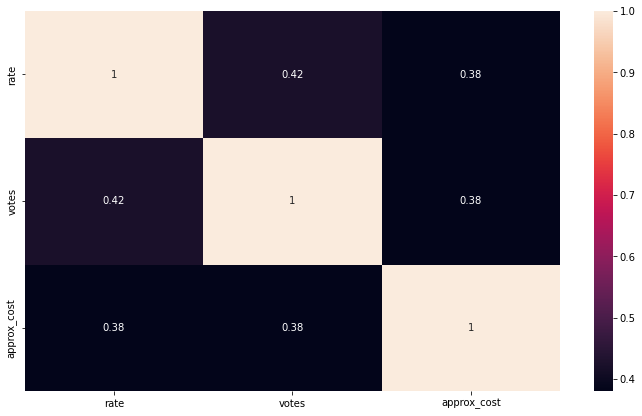

In [194]:
# checking the correlation
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [195]:
# Droping the records with more null values
df1=df1.dropna(thresh=5,axis=0)

In [196]:
# imputing the rate column with mean as the data is symmentric
df1.rate=df1.rate.fillna(df.rate.mean())

In [197]:
# imputing the approx_cost column with mean as the data is skewed
df1.approx_cost=df1.approx_cost.fillna(df1.approx_cost.median())

In [198]:
# imputing the location column with forward filling
df1.location=df1.location.ffill()

In [199]:
# droping the records of where there are null values in rest_type column
# as the same records have null values in dish_liked
df1=df1.dropna(subset='rest_type',axis=0)

In [200]:
# droping the records of where there are null values in cuisines column
# as the same records have null values in dish_liked
df1=df1.dropna(subset='cuisines',axis=0)

In [202]:
# dropping the dish-liked columns
df1.drop('dish_liked',axis=1,inplace=True)

In [203]:
df1.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

## Step 4: Once the basic preprocessing is done like converting the data types, missing value imputation, and duplicate rows. perform the EDA(Exploratory Data Analysis) on the data to  find the various factors that will help to understand the cost per two persons. 

## Bivariate analysis

In [214]:
num_cols=df1.select_dtypes(include=np.number)
cat_cols=df1.select_dtypes(exclude=np.number)


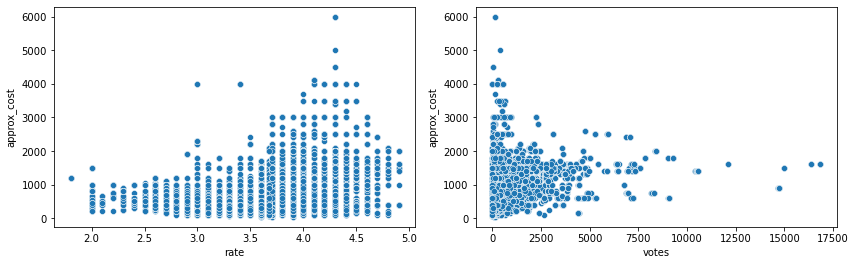

In [212]:
# Numerical columns
it=1
for i in num_cols.drop('approx_cost',axis=1):
    plt.subplot(2,2,it)
    sns.scatterplot(df1[i],df1.approx_cost)
    it+=1
plt.tight_layout()
plt.show()

In [ ]:
# There are not much correlation of these variables with target

In [220]:
cat_cols.columns

Index(['name', 'online_order', 'book_table', 'location', 'rest_type',
       'cuisines', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

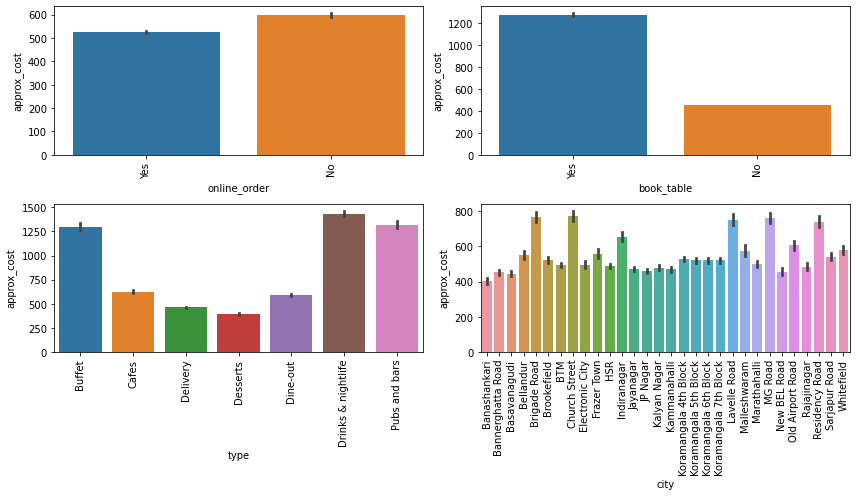

In [250]:
# categorical
cols=['online_order', 'book_table','type', 'city']
it=1
plt.figure(figsize=(12,7))
for i in cols:
    plt.subplot(2,2,it)
    sns.barplot(df1[i],df1.approx_cost)
    plt.xticks(rotation=90)
    it+=1
plt.tight_layout()
plt.show()

* The approx cost for no online order is high
* Those booked table their approx cost is high
* Drinks & nightlife type has the higher cost
* 5 cities have higher cost than others

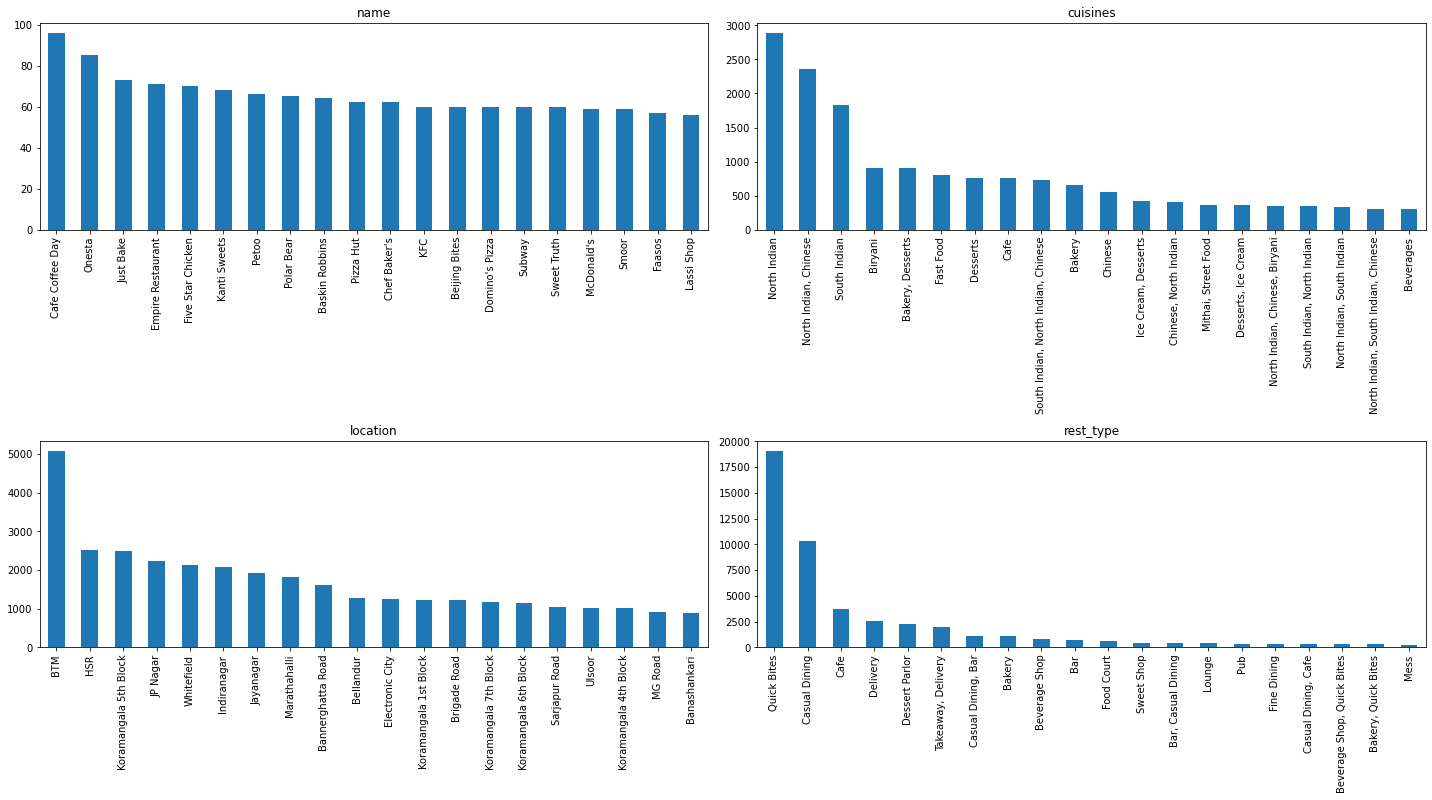

In [262]:
# univariate on other numerical columns
cols=['name', 'cuisines','location', 'rest_type']
it=1
plt.figure(figsize=(20,15))
for i in cols:
    plt.subplot(3,2,it)
    df1[i].value_counts()[:20].sort_values(ascending=False).plot(kind='bar')
#     sns.countplot(df1[i][:20])
    plt.xticks(rotation=90)
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

* cafe coffee day name is most frequently occured
* North indian cuisines are more in number
* BTM is famous location
* The most frequent restuarant type is Quick bites 

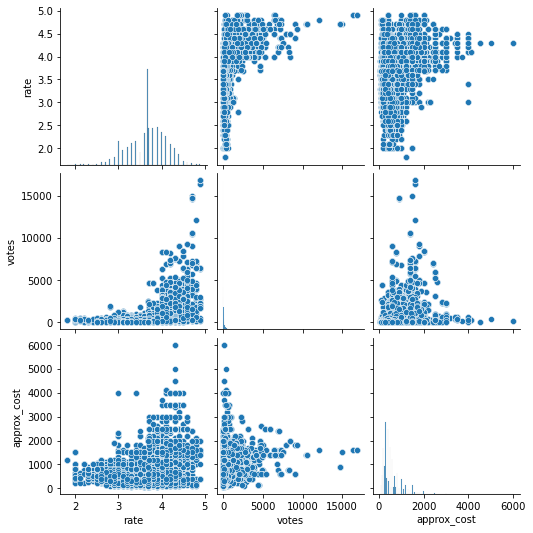

In [219]:
# Multivariate anlaysis
sns.pairplot(df1)
plt.show()

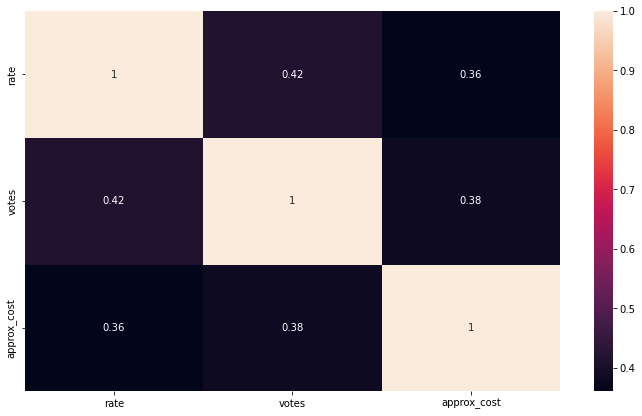

In [216]:
# checking the correlation
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [ ]:
# The correlation among the variable is very less

## Step 5: Make a copy of the data set and Perform the preprocessing that require for the model.
Note: You can see many categorical variables with a high number of unique values. 
Therefore do not keep dropping the variables as the first option, try to create new variables 
or perform any other feature engineering methods.

In [263]:
# Making a copy of dataset
f_df=df1.copy()

In [264]:
f_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Step 6: Perform statistical hypothesis testing on features to get an idea of whether features are impacting the target variables.


In [267]:
# hypothesis testing between stroke feature and other numerical features
# H0: Both groups have equal mean indicating that they are insignificant.
# H1: Both groups do not have equal mean indicating that they are significant.
significant_features=[]
for i in num_cols:
    if i !='approx_cost':
        pvalue=stats.ttest_ind(df1[i],df1.approx_cost)[1]
        if pvalue<0.05:
            print(i,pvalue)
            significant_features.append(i)
        else:
            print(i,pvalue)
print('The significant Features are ',significant_features)

rate 0.0
votes 0.0
The significant Features are  ['rate', 'votes']


In [ ]:
import statsmodels.formula.api as sfa
model=sfa.ols('approx_cost~location',data=df1).fit()
aov_table=sfa.stats.anova_lm(model)
aov_table

## Step 7: Split the dataset into train and test data sets and Perform the scaling on both sets if necessary

In [ ]:
from sklearn.model_selection import test_train_split
x=
y=df1.approx_cost
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

## Step 8: Build the base model.

In [ ]:
import statsmodels.api as sma
temp_tr=sma.add_constant(xtrain)
temp_te=sma.add_constant(xtest)

model=sma.fit(ytrain,xtrain).fit()
model.summary()

## Step 9: Understand how the model is performing, Perform feature engineering again if needed. Do feature selection. Try with various models like a parametric and nonparametric models. Once you choose the final model, rebuild the model with best  parameters. 
Note: If you are performing with Linear models, check the model is fulfilling the 
assumptions.

## Step 10: Based on your understanding of the model and EDA analysis, Explain the business understanding

# Section B:

## Steps that are to be followed:
## Step 1: Understand the problem statement, Identify the metric for the problem.

## Problem Statement:

The model that you built in the above case study has gone to deployment and Zomato has 
been impressed with your data analysis and Zomoto has been believing that your analysis 
going to be impactful. Now Zomato has been observing the orders happening online and 
offline, Due to offline orders, Zomato is not able to attract customers with diverse items and 
offers, and the user subscription also getting low. so it has decided to give you the project 
on the same. Now the problem statement is that Zomato wants to know whether the 
customer would order the orders online or offline so that Zomato can take further 
strategies to improve the online order.

## Objective:
The Aim is to classify the orders that have been ordered online and offline. And 
identify the patterns that lead to orders online orders as well as offline. Your model should 
be able to classify the classes effectively.

## Step 2: Use the data sets that have been cleaned data types and missing values in section A step 3.

## Step 3:
* i) Explore the data and find the hidden patterns in the data that affect your  objective(target variable).  
* ii) Find the features that would impact the target variable.

## Step 4: Do the preprocessing in a way that impacts the models that you going to build.
Note: If you feel the few preprocessing steps that you did in section 1, feel free to use 
those steps.

## Step 5: Prove statistically about step 2 point ii

## Step 6: Split the data into train and test sets.


## Step 7: Build the base model and Identify your metric based on the problem

## Step 8: Try to improve your metric by trying different models, changing the feature engineering methods, feature selection, etc.

## Step 9: Choose the final model and tune the model

## Step 10: Write your business interpretation. And explain the reasons behind choosing the final model and how the chosen model performs well compared to other models.